In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data from users_hate_glove.content file
data = pd.read_csv(r"C:\Users\hs414\OneDrive\Desktop\Major_2024\data\hate\users_hate_glove.content", header=None, delimiter="\t")


data = data.rename(columns={0: "user_id", 301: "hate_label"})


In [185]:
data

,user_id,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,hate_label
0,0,-1.089073,-0.819852,-0.892742,-1.340293,-0.062930,0.328899,0.253635,0.115707,-0.727039,...,-0.185449,-1.034164,-0.923736,0.068635,1.911311,-1.025432,-0.438166,0.582276,0.765071,normal
22,22,-0.020976,-0.658948,-1.183166,-2.388986,0.506060,0.732390,0.298279,-1.706375,-0.149522,...,-1.982040,-1.307111,-1.613784,0.869954,-0.547563,-0.430940,0.233932,1.112722,0.660885,normal
29,29,1.257068,0.523684,-0.423057,-0.642238,-0.072245,-0.471483,-0.338337,0.107110,-1.360391,...,-0.118747,0.323238,-1.461468,-0.324437,0.767427,-0.020313,-0.047015,1.172450,-0.757194,normal
44,44,-0.383711,-0.027758,1.823646,0.944793,0.759426,1.631036,0.775020,0.550644,0.298231,...,-0.872055,0.131165,0.554441,-0.865574,0.555545,0.219754,1.394477,-1.372494,0.165514,normal
85,85,-0.210998,-0.514974,0.184683,0.451372,-0.594404,-0.377794,-0.113593,0.553205,-0.789661,...,-0.039548,-0.004352,0.188056,-0.084436,-0.228187,-0.505434,0.323775,-0.373355,0.058962,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100332,100332,1.266575,-3.767221,1.751611,0.357219,-2.891968,1.739417,-0.556690,1.830134,-0.395613,...,-0.971162,0.473542,2.970558,-1.482317,1.397850,1.487283,1.677759,-0.374852,-3.406609,normal
100338,100338,-0.757479,-0.002999,-0.107967,0.310481,-0.277060,-0.249805,-0.351850,0.635101,-0.750882,...,0.025095,0.015699,-0.672534,-0.446668,0.944820,-0.020044,0.021873,0.269817,0.098479,normal
100362,100362,0.631749,-0.398604,-0.371031,-0.374350,0.772634,-0.258960,-0.571235,0.956809,-0.108297,...,0.391021,-1.007163,0.689926,-0.378117,1.757827,-0.793881,-0.193041,-0.347878,0.099196,normal
100380,100380,-1.243691,-0.482678,0.389554,0.642738,-0.411359,-0.795607,-0.546549,0.901010,-0.985417,...,0.819497,-0.735104,-0.560206,-0.054413,1.857762,0.384953,0.221914,-0.671530,0.149727,hateful


In [99]:
# Check if there are any null values in the entire dataset
any_null = data.isnull().any().any()
any_null


False

In [100]:
data = data[data["hate_label"] != "other"]

In [101]:
features = data.iloc[:, 1:301]
labels = data.iloc[:, -1]

In [186]:
labels

0          normal
22         normal
29         normal
44         normal
85         normal
           ...   
100332     normal
100338     normal
100362     normal
100380    hateful
100385     normal
Name: hate_label, Length: 4971, dtype: object

In [102]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [103]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)



In [104]:

X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels_encoded, test_size=0.2, random_state=42)

In [105]:
data['hate_label'].value_counts()

hate_label
normal     4427
hateful     544
Name: count, dtype: int64

0          normal
22         normal
29         normal
44         normal
85         normal
           ...   
100332     normal
100338     normal
100362     normal
100380    hateful
100385     normal
Name: hate_label, Length: 4971, dtype: object


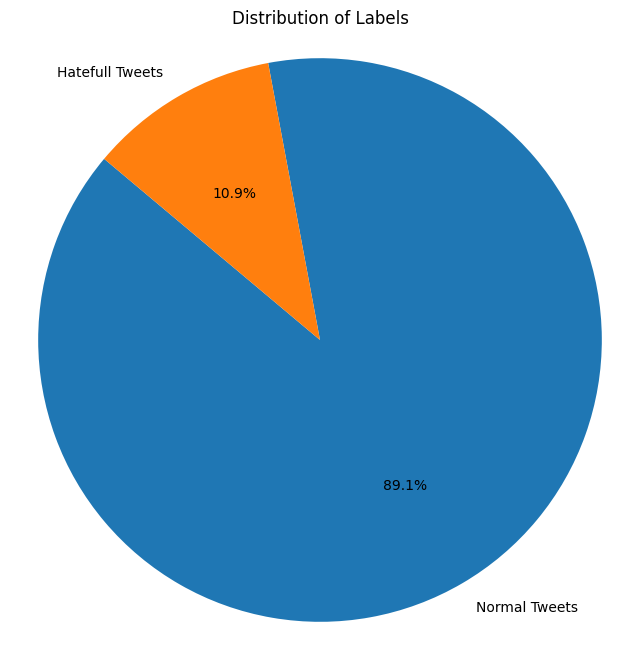

In [106]:
import matplotlib.pyplot as plt
label_counts = data['hate_label'].value_counts()


labels_name = ['Normal Tweets','Hatefull Tweets']
counts = label_counts.values

print(labels)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels_name, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')
plt.show()

In [107]:
df_features = pd.read_csv(r'C:\Users\hs414\OneDrive\Desktop\Major_2024\data\hate\users_neighborhood_anon.csv')

In [108]:
from sklearn.utils import class_weight


# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(labels_encoded), y=labels_encoded)
class_weights

array([4.56893382, 0.56144116])

In [109]:
label_encoder.classes_

array(['hateful', 'normal'], dtype=object)

## Using Logistic regression with calculated class weights on the feature set

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are your training and testing data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels_encoded, test_size=0.2, random_state=42)

# Define logistic regression classifier with class weights
lr = LogisticRegression(class_weight=dict(enumerate(class_weights)))

# Train the model
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.79      0.53       112
           1       0.97      0.84      0.90       883

    accuracy                           0.84       995
   macro avg       0.68      0.82      0.71       995
weighted avg       0.90      0.84      0.86       995



c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Using Random Forest Classifier on the Dataset

In [111]:
rf = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.35      0.50       112
           1       0.92      0.99      0.96       883

    accuracy                           0.92       995
   macro avg       0.89      0.67      0.73       995
weighted avg       0.92      0.92      0.91       995



## Support Vector Classifier on the Dataset

In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


svm = SVC(class_weight=dict(enumerate(class_weights)))
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.82      0.61       112
           1       0.98      0.89      0.93       883

    accuracy                           0.88       995
   macro avg       0.73      0.86      0.77       995
weighted avg       0.92      0.88      0.89       995



## Using Decision Tree Classifier on the Dataset

In [113]:
dt = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)))

# Train the model
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.44      0.44       112
           1       0.93      0.93      0.93       883

    accuracy                           0.88       995
   macro avg       0.69      0.68      0.69       995
weighted avg       0.87      0.88      0.88       995



## Using Smote on the dataset and then re evaluating using other algorithms

In [114]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Using Logistic Regression on Dataset after applying SMOTE

In [115]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model with class weights
lr = LogisticRegression()

# Train the model
lr.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.74      0.51       112
           1       0.96      0.86      0.91       883

    accuracy                           0.84       995
   macro avg       0.68      0.80      0.71       995
weighted avg       0.90      0.84      0.86       995



c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Using Random Forest Classifier

In [116]:
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       112
           1       0.94      0.96      0.95       883

    accuracy                           0.91       995
   macro avg       0.78      0.75      0.77       995
weighted avg       0.91      0.91      0.91       995



## Using Naive Bayes Algorithm

In [117]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
nb = GaussianNB()

# Train the model
nb.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.83      0.35       112
           1       0.97      0.64      0.77       883

    accuracy                           0.66       995
   macro avg       0.60      0.73      0.56       995
weighted avg       0.88      0.66      0.72       995



## Using K Nearest Neighbour Classifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.30      0.84      0.44       112
           1       0.97      0.75      0.85       883

    accuracy                           0.76       995
   macro avg       0.64      0.80      0.65       995
weighted avg       0.90      0.76      0.80       995



## Using Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model with class weights
dt = DecisionTreeClassifier(class_weight='balanced')

# Train the model
dt.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.36      0.55      0.44       112
           1       0.94      0.88      0.91       883

    accuracy                           0.84       995
   macro avg       0.65      0.72      0.67       995
weighted avg       0.87      0.84      0.85       995



## Using ADA BOOST

In [120]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
ada = AdaBoostClassifier()

# Train the model
ada.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = ada.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.39      0.71      0.51       112
           1       0.96      0.86      0.91       883

    accuracy                           0.84       995
   macro avg       0.68      0.79      0.71       995
weighted avg       0.90      0.84      0.86       995



# Since we can see that applying class weights gives better accuracy and f1 scores than using synthetic minority oversampling  technique (SMOTE), we will consider class_weights to be appropriate for the following data set

## Now lets try under sampling the data

In [121]:
data.head()

,user_id,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,hate_label
0,0,-1.089073,-0.819852,-0.892742,-1.340293,-0.062930,0.328899,0.253635,0.115707,-0.727039,...,-0.185449,-1.034164,-0.923736,0.068635,1.911311,-1.025432,-0.438166,0.582276,0.765071,normal
22,22,-0.020976,-0.658948,-1.183166,-2.388986,0.506060,0.732390,0.298279,-1.706375,-0.149522,...,-1.982040,-1.307111,-1.613784,0.869954,-0.547563,-0.430940,0.233932,1.112722,0.660885,normal
29,29,1.257068,0.523684,-0.423057,-0.642238,-0.072245,-0.471483,-0.338337,0.107110,-1.360391,...,-0.118747,0.323238,-1.461468,-0.324437,0.767427,-0.020313,-0.047015,1.172450,-0.757194,normal
44,44,-0.383711,-0.027758,1.823646,0.944793,0.759426,1.631036,0.775020,0.550644,0.298231,...,-0.872055,0.131165,0.554441,-0.865574,0.555545,0.219754,1.394477,-1.372494,0.165514,normal
85,85,-0.210998,-0.514974,0.184683,0.451372,-0.594404,-0.377794,-0.113593,0.553205,-0.789661,...,-0.039548,-0.004352,0.188056,-0.084436,-0.228187,-0.505434,0.323775,-0.373355,0.058962,normal


In [122]:
minority_class = data[data['hate_label'] == 'hateful']
majority_class = data[data['hate_label'] == 'normal']

In [123]:
from sklearn.utils import resample
majority_downsample = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

In [124]:
downsampled_df = pd.concat([majority_downsample, minority_class])
downsampled_df.shape

(1088, 302)

In [125]:
features = downsampled_df.iloc[:, 1:301]
labels = downsampled_df.iloc[:, -1]

In [126]:
labels_encoded = label_encoder.fit_transform(labels)
scaled_features = scaler.fit_transform(features)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels_encoded, test_size=0.2, random_state=42)

In [128]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model with class weights
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       102
           1       0.79      0.73      0.76       116

    accuracy                           0.76       218
   macro avg       0.76      0.76      0.76       218
weighted avg       0.76      0.76      0.76       218



c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       102
           1       0.81      0.83      0.82       116

    accuracy                           0.80       218
   macro avg       0.80      0.80      0.80       218
weighted avg       0.80      0.80      0.80       218



In [130]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
nb = GaussianNB()

# Train the model
nb.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       102
           1       0.74      0.80      0.77       116

    accuracy                           0.75       218
   macro avg       0.75      0.74      0.74       218
weighted avg       0.75      0.75      0.75       218



In [131]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       102
           1       0.85      0.76      0.80       116

    accuracy                           0.80       218
   macro avg       0.81      0.81      0.80       218
weighted avg       0.81      0.80      0.80       218



In [132]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model with class weights
dt = DecisionTreeClassifier(class_weight='balanced')

# Train the model
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       102
           1       0.72      0.66      0.69       116

    accuracy                           0.68       218
   macro avg       0.68      0.68      0.68       218
weighted avg       0.69      0.68      0.68       218



In [133]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
ada = AdaBoostClassifier()

# Train the model
ada.fit(X_train, y_train)

# Predictions
y_pred = ada.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

c:\Users\hs414\OneDrive\Desktop\Major_2024\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.70      0.75      0.72       102
           1       0.76      0.72      0.74       116

    accuracy                           0.73       218
   macro avg       0.73      0.73      0.73       218
weighted avg       0.73      0.73      0.73       218



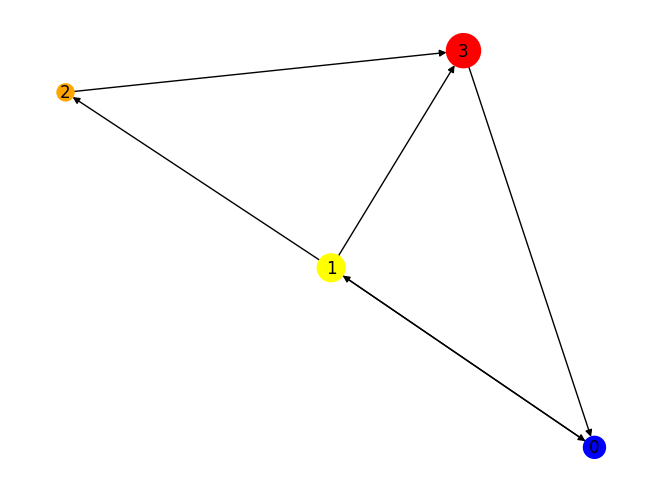

In [134]:
import networkx as nx
H = nx.DiGraph()

#adding nodes
H.add_nodes_from([
  (0, {"color": "blue", "size": 250}),

  (1, {"color": "yellow", "size": 400}),

  (2, {"color": "orange", "size": 150}),

  (3, {"color": "red", "size": 600})


])

#adding edges
H.add_edges_from([
  (0, 1),

  (1, 2),

  (1, 0),

  (1, 3),

  (2, 3),

  (3,0)


])

node_colors = nx.get_node_attributes(H, "color").values()
colors = list(node_colors)
node_sizes = nx.get_node_attributes(H, "size").values()
sizes = list(node_sizes)

#Plotting Graph
nx.draw(H, with_labels=True, node_color=colors, node_size=sizes)

## Using BiLSTM on the given data set using set class weights

In [168]:
features = data.iloc[:, 1:301]
labels = data.iloc[:, -1]
labels_encoded = label_encoder.fit_transform(labels)
scaled_features = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels_encoded, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [190]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Reshape, LSTM, Dropout, Dense, Bidirectional

embedding_dim = 100
max_length = 300
vocab_size = len(np.unique(scaled_features))+1
print(vocab_size)
model = Sequential([
    # Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Reshape((max_length, embedding_dim)),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(128),
    Dense(1, activation='softmax')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print(model.summary())

1485113


In [192]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32,class_weight = dict(enumerate(class_weights)))

Epoch 1/10
125/125 [==============================] - 56s 446ms/step - loss: 0.6586 - accuracy: 0.8913 - val_loss: 0.5167 - val_accuracy: 0.8874
Epoch 2/10
125/125 [==============================] - 53s 421ms/step - loss: 0.6549 - accuracy: 0.8913 - val_loss: 0.8779 - val_accuracy: 0.8874
Epoch 3/10
125/125 [==============================] - 57s 453ms/step - loss: 0.6924 - accuracy: 0.8913 - val_loss: 0.8632 - val_accuracy: 0.8874
Epoch 4/10
125/125 [==============================] - 54s 432ms/step - loss: 0.6897 - accuracy: 0.8913 - val_loss: 0.7217 - val_accuracy: 0.8874
Epoch 5/10
125/125 [==============================] - 56s 447ms/step - loss: 0.6742 - accuracy: 0.8913 - val_loss: 0.8035 - val_accuracy: 0.8874
Epoch 6/10
125/125 [==============================] - 51s 406ms/step - loss: 0.6733 - accuracy: 0.8913 - val_loss: 0.5880 - val_accuracy: 0.8874
Epoch 7/10
125/125 [==============================] - 51s 412ms/step - loss: 0.6712 - accuracy: 0.8913 - val_loss: 0.7225 - val_ac

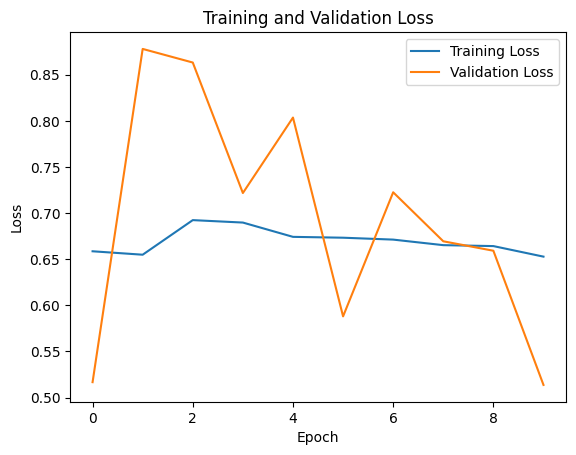

In [193]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

,user_id,hate,hate_neigh,normal_neigh,statuses_count,followers_count,followees_count,favorites_count,listed_count,betweenness,...,c_feminine_empath,c_medieval_empath,c_journalism_empath,c_farming_empath,c_plant_empath,c_shopping_empath,c_ship_empath,c_religion_empath,c_tourism_empath,c_power_empath
0,0,normal,True,True,101767,3504,3673,81635,53,100467.895084,...,0.001380,0.003288,0.000255,0.002189,0.000593,0.003689,0.003559,0.001634,0.002662,0.007487
1,1,other,False,False,2352,19609,309,61,197,0.000000,...,0.000802,0.004465,0.000444,0.001632,0.001298,0.002183,0.008969,0.004975,0.000647,0.003419
2,2,other,False,False,1044,2371,2246,561,16,4897.117853,...,0.000985,0.005284,0.000554,0.001084,0.001359,0.002041,0.016846,0.004881,0.001214,0.003347
3,3,other,False,False,167172,3004,298,3242,53,9.864754,...,0.001391,0.002061,0.001116,0.001282,0.000000,0.001951,0.015423,0.000446,0.000446,0.005241
4,4,other,False,False,1998,17643,19355,485,239,0.000000,...,0.000633,0.035382,0.000317,0.000475,0.000475,0.002431,0.007656,0.033273,0.072792,0.003698
5,5,other,False,False,523,124,135,439,3,615.566181,...,0.003140,0.001449,0.000000,0.001449,0.000163,0.003389,0.013682,0.002486,0.001996,0.005875
6,6,other,True,False,1136,2916,4594,47,3,433.745500,...,0.000269,0.005178,0.000267,0.006838,0.000689,0.002362,0.006077,0.001035,0.002015,0.005427
7,7,other,False,False,20488,5980,2225,1422,356,4295.887385,...,0.001027,0.003927,0.000296,0.002616,0.001053,0.003678,0.005731,0.001461,0.004009,0.004851
8,8,other,False,False,4356,139,114,90,1,0.000000,...,0.000000,0.000678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000700,0.000000,0.000000
9,9,other,False,True,50565,1618,499,613,24,63413.364995,...,0.001973,0.002282,0.001044,0.001973,0.001422,0.004187,0.003877,0.004072,0.005919,0.004921
